# Silicon Band Gap Energy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# We will use the scipy curve_fit function to fit a model to data.
from scipy.optimize import curve_fit

Enter data from table as numpy arrays

In [64]:
t_cel = np.array([-15., -10., -8., -6., -4.2, -2.3, 0., 2., 
                3.6, 5.8, 8.2, 10., 12.8, 16.2, 20.])
adu = np.array([13, 15, 16, 17, 19, 22, 24, 28, 32, 37, 
                43, 50, 62, 89, 139])

Convert Celsius to Kelvin

In [65]:
t_kel = t_cel + 273.15

Convert ADU (counts) to electrons

In [66]:
electrons = 2.3 * adu

Convert electrons to electrons per second

In [74]:
electrons_per_sec = electrons /120

## Plot dark current (e-/sec) vs. inverse temperature
Make a plot in the cell below

Text(0,0.5,'1/T')

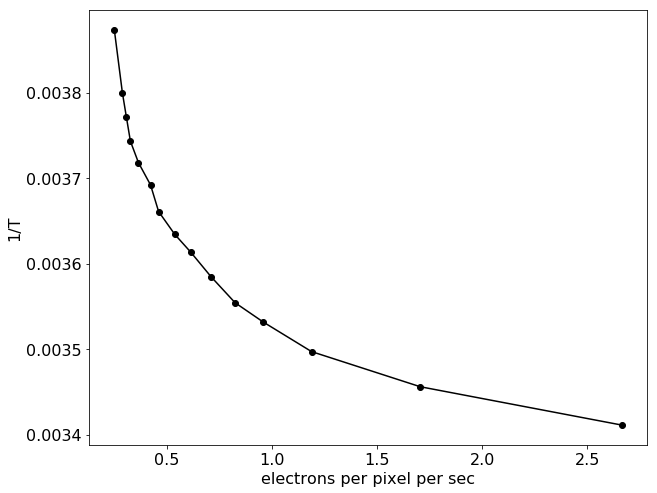

In [75]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16
plt.plot(electrons_per_sec, 1/t_kel,'-ko')
plt.xlabel('electrons per pixel per sec')
plt.ylabel('1/T')

## Fit for the band gap energy
We will try to fit a model for dark current of the form

$D = \alpha e^{-e_g/2k_bT}$

In [76]:
# The Boltzmann constant
k_b = 8.6175e-5

def dark_current(t_k, alpha, e_g):
    """
    Analytic expression for dark current as a function of temperature.
    
    Parameters
    ----------
    t_k : numpy.ndarray
        Temperature in Kelvin
    alpha : float
        Constant coefficient in front of exponential funtion.
    e_g : float
        Band gap energy in eV.
    
    Returns
    -------
    dark_current : numpy.ndarray
        Dark current in electrons/pixel/second.
    """
    dark_current = alpha * np.exp(-e_g / (2 * k_b * t_k))
    return dark_current

## Inital guesses for parameters
We need initial guesses for the values of $\alpha$ and $e_g$.

In [77]:
t_0 = t_kel[-1]
d_0 = electrons_per_sec[-1]

alpha_0 =  d_0 / np.exp(-1.1 / (2 * k_b * t_0))
e_g_0 = 1.1

## Least squares fit

In [78]:
p_opt, p_cov = curve_fit(dark_current, t_kel, electrons_per_sec, p0=[alpha_0, e_g_0])

# Errors in the fit
sig_alpha, sig_e_g = np.sqrt(np.diag(p_cov))
print(p_cov)

[[1.07841445e+22 6.93819213e+09]
 [6.93819213e+09 4.46590005e-03]]


## Best fit values

In [79]:
alpha_fit, e_g_fit = p_opt
print(alpha_fit)
print(e_g_fit)

77098910165.43013
1.2205226843061665


## Plot the data and best fit model

Make a plot in the cell below. To plot the model, use the `dark_current` function with `alpha_fit` and `e_g_fit`.

Text(0,0.5,'1/T')

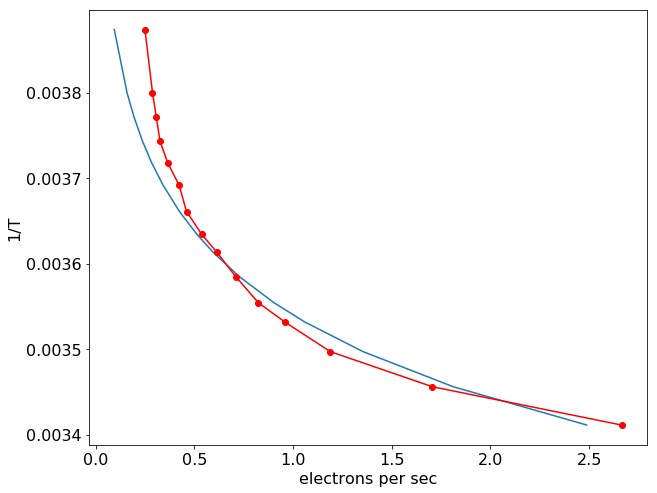

In [80]:
dc = dark_current(t_kel, alpha_fit, e_g_fit)
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16
plt.plot(dc, 1/t_kel)
plt.plot(electrons_per_sec, 1/t_kel,'-ro')
plt.xlabel('electrons per sec')
plt.ylabel('1/T')